In [1]:
import os
import pickle as pkl
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [10]:
with open('plasticc.pkl', 'rb') as f:
    u = pkl._Unpickler(f)
    u.encoding = 'latin1'
    plsticc_lc = u.load()

Text(0.5, 0.98, '$\\mathrm{Plasticc } \\; \\mathrm{ light curves}$')

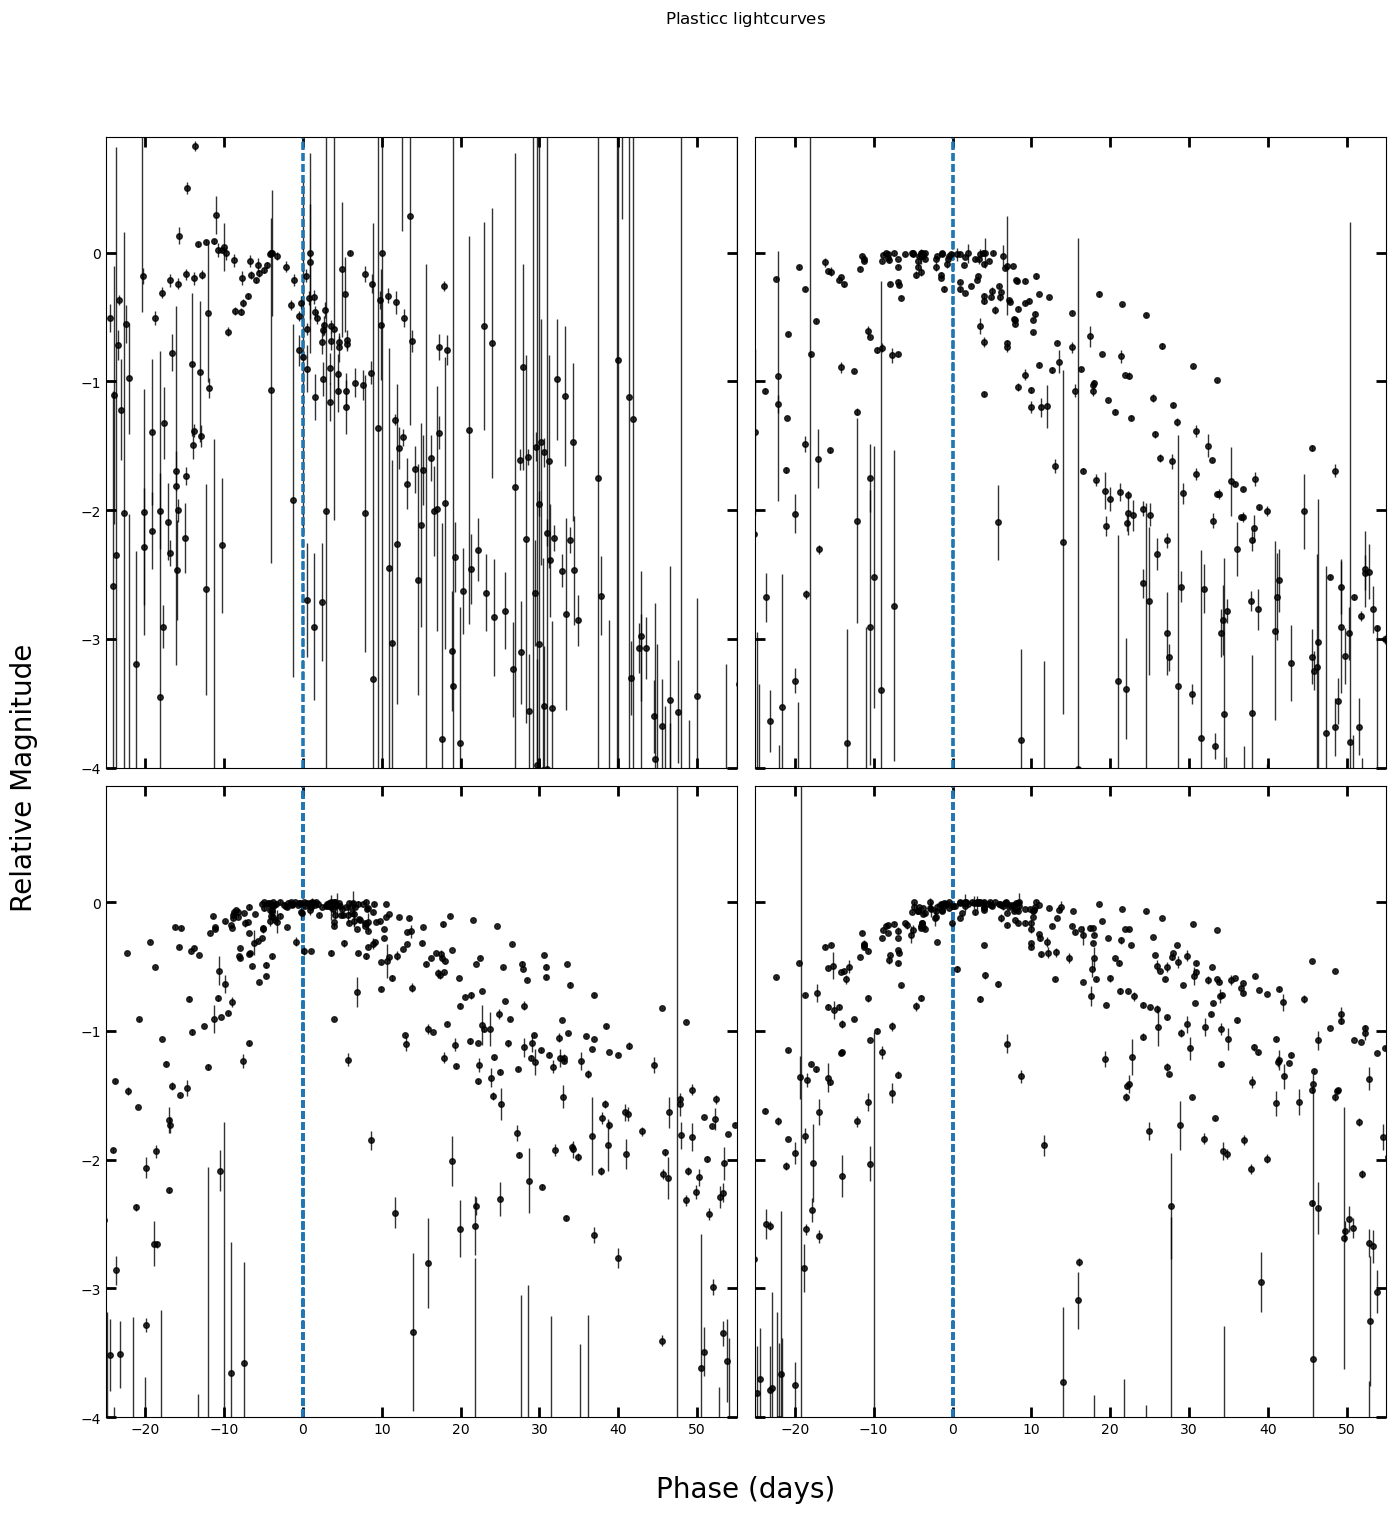

In [26]:
fig, ax = plt.subplots(2,2, sharex=True, sharey=True, figsize=(16,16))
for j, b in enumerate(plsticc_lc.keys()): 
    for i, ID in enumerate(plsticc_lc[b].keys()):
        
        np.concatenate(ax)[j].errorbar(plsticc_lc[b][ID]['phs'], 
                                       plsticc_lc[b][ID]['mag'], 
                                       yerr=plsticc_lc[b][ID]['err'], 
                                       fmt='o',
                                       markersize = 4,
                                       linewidth = 1, 
                                       color = 'k', 
                                       alpha=0.8)
        
        np.concatenate(ax)[j].axvline(0, linestyle='--')
        np.concatenate(ax)[j].tick_params(axis="both", direction="in", which="major",\
                                              right=True, top=True, size=7, labelsize=10, width = 2)
np.concatenate(ax)[0].set_xlim(-25,55)
np.concatenate(ax)[0].set_ylim(-4,0.9)
plt.subplots_adjust(hspace=.03, wspace=0.03, top = 0.9, left = 0.1, bottom = 0.1)
fig.text(0.5, 0.05, 'Phase (days)', ha='center', size = 20)
fig.text(0.04, 0.5, 'Relative Magnitude', va='center', rotation='vertical', size = 20)
fig.suptitle(r'$\mathrm{Plasticc } \; \mathrm{ light curves}$')

In [27]:
with open('elasticc.pkl', 'rb') as f:
    u = pkl._Unpickler(f)
    u.encoding = 'latin1'
    elasticc_lc = u.load()

In [53]:
elasticc_lc['Ib'][key]

{'r': {'phs': array([-27.46062132,  -8.50692132,  -0.53342132,   0.42087868,
           0.47727868,  17.40287868]),
  'mag': array([-4.595112  , -0.9056606 , -0.39782333, -0.30186653, -0.38845062,
         -1.2627296 ], dtype=float32),
  'err': array([1.0724651 , 0.1055703 , 0.04382688, 0.04314411, 0.04221252,
         0.08834209], dtype=float32)}}

In [56]:
for key in (elasticc_lc['Ib'].keys()):
    try:
        print(key, len(elasticc_lc['Ib'][key]['u']))
    except:
        pass
    

per_day_med 2
1129 3


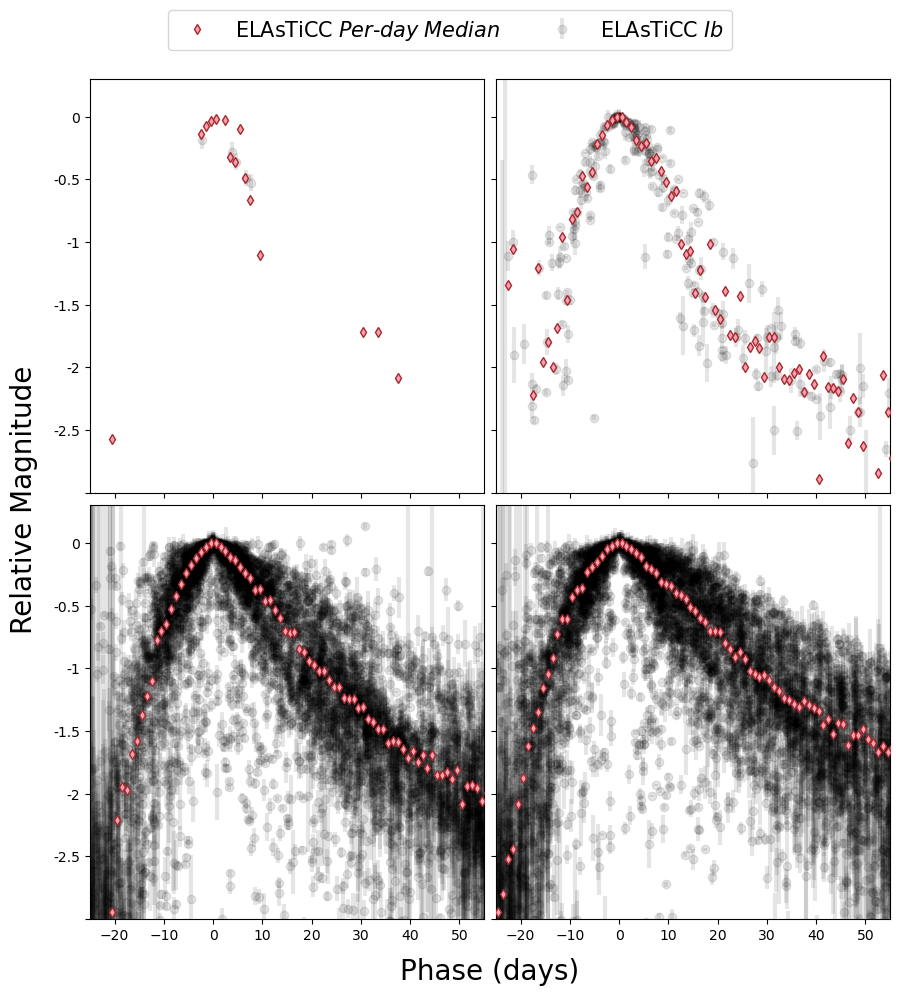

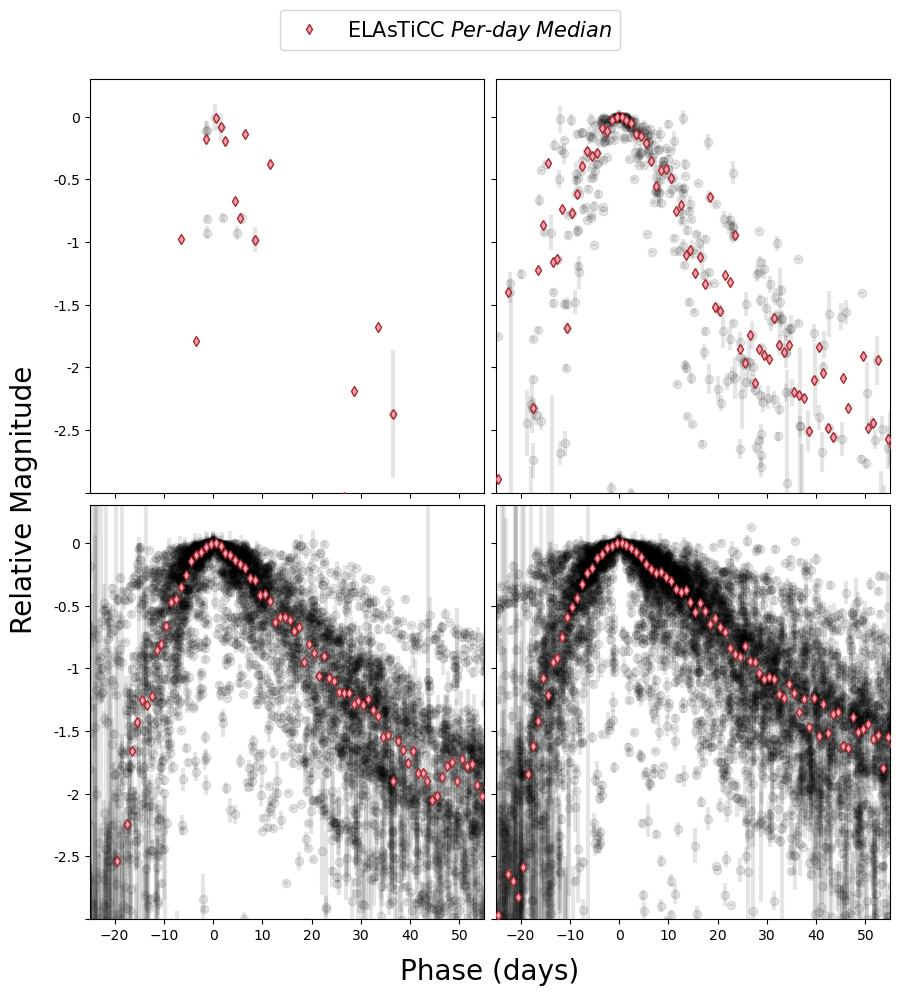

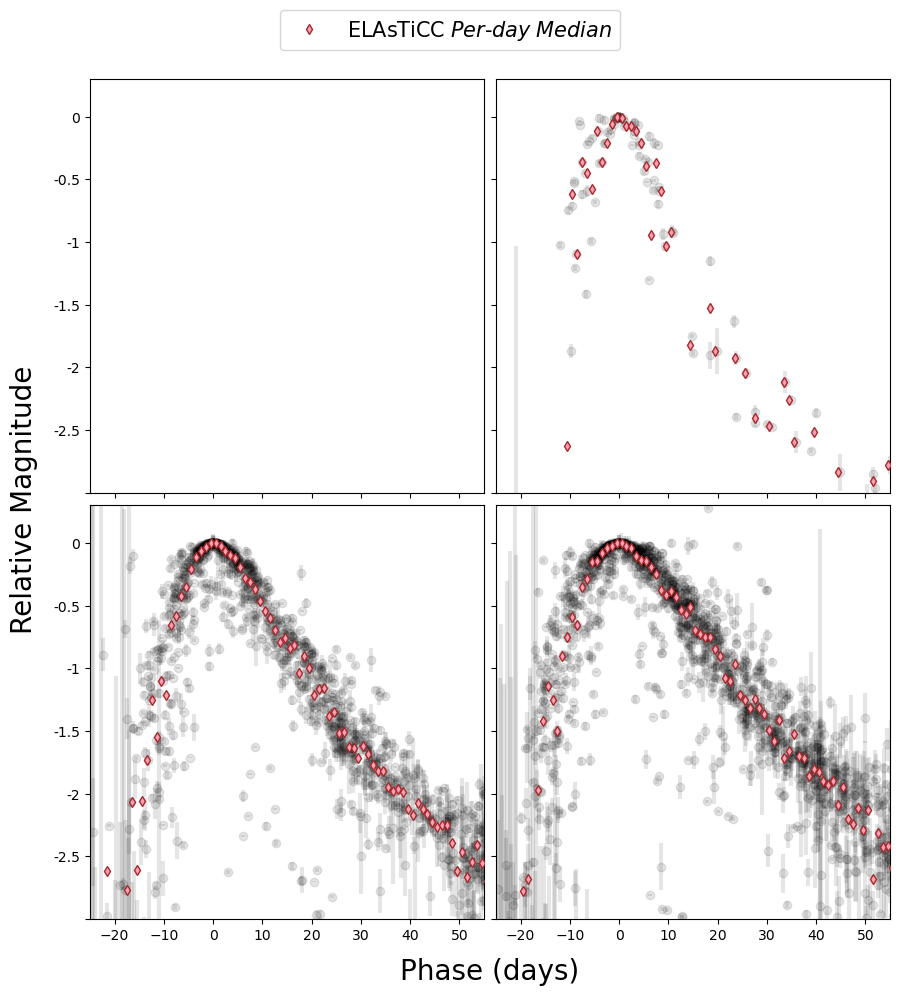

In [58]:
b_index = {'u':0,
           'g':1,
           'r':2,
           'i':3}

for sntype in list(elasticc_lc.keys()):
    fig, ax = plt.subplots(2,2, sharex=True, sharey=True, figsize=(10,10))
    
    for c, key in enumerate(elasticc_lc[sntype].keys()):
        if c == 0:
            for j, keyband in enumerate(elasticc_lc[sntype][key].keys()):
                np.concatenate(ax)[b_index[keyband]].plot(elasticc_lc[sntype][key][keyband]['med_t'], 
                                           elasticc_lc[sntype][key][keyband]['med'], "d",
                                            markersize = 5, color = '#fa9fb5',
                                           markeredgecolor='brown', zorder=10,
                                               label = r'$\mathrm{ELAsTiCC }\; Per$-$day\; Median$')
                
        else:
            for j, keyband in enumerate(elasticc_lc[sntype][key].keys()):
                if j==0 and c==1:
                    np.concatenate(ax)[b_index[keyband]].errorbar(elasticc_lc[sntype][key][keyband]['phs'],
                                               elasticc_lc[sntype][key][keyband]['mag'] , 
                                               yerr=elasticc_lc[sntype][key][keyband]['err'], 
                                               fmt='o',\
                                               linewidth = 3, color = 'k', alpha = 0.1,
                                               label = r'$\mathrm{ELAsTiCC }\;$'+'$'+sntype+'$')
                else:
                    np.concatenate(ax)[b_index[keyband]].errorbar(elasticc_lc[sntype][key][keyband]['phs'],
                                               elasticc_lc[sntype][key][keyband]['mag'] , 
                                               yerr=elasticc_lc[sntype][key][keyband]['err'], 
                                               fmt='o',\
                                               linewidth = 3, color = 'k', alpha = 0.1)


    
    
    handles, labels = np.concatenate(ax)[2].get_legend_handles_labels()
    fig.legend(handles, labels, loc='upper center', ncol=2, prop={'size':15})
    np.concatenate(ax)[0].set_xlim(-25,55)
    np.concatenate(ax)[0].set_ylim(-3,0.3)
    np.concatenate(ax)[0].set_yticks([0, -0.5, -1, -1.5, -2, -2.5, -3])
    np.concatenate(ax)[0].set_yticklabels([ '0','-0.5',  '-1', '-1.5', '-2', '-2.5', ''], size=10)
    np.concatenate(ax)[2].set_yticklabels(['0','-0.5',  '-1', '-1.5', '-2', '-2.5', ''], size=10)
    plt.subplots_adjust(hspace=.03, wspace=0.03, top = 0.92, left = 0.1, bottom = 0.08)
    fig.text(0.5, 0.02, 'Phase (days)', ha='center', size = 20)
    fig.text(0.02, 0.5, 'Relative Magnitude', va='center', rotation='vertical', size = 20)